In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np

## CEM Intervention Plots

In [4]:
methods = ['Shapley','Label','CEM','Concept2Vec','Baseline']

In [5]:
data_by_method = {}
for m in methods:
    data_by_method[m] = pickle.load(open("results/intervention/{}.pkl".format(m.lower()),"rb"))

In [6]:
data_by_method['Baseline']

{0: [{'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218060255050659,
   'test_task_loss': 1.4756649732589722,
   'test_loss': 4.584694862365723,
   'test_avg_c_y_acc': 0.8762766718864441},
  {'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218060255050659,
   'test_task_loss': 1.4756649732589722,
   'test_loss': 4.584694862365723,
   'test_avg_c_y_acc': 0.8762766718864441},
  {'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218

In [7]:
sns.set()

In [14]:
def plot_all_results(results_list, methods, location,show_std=False):
    clrs = sns.color_palette("colorblind", len(methods))
    sns.set_style("white")

    for i, result in enumerate(results_list):
        name = methods[i]

        color = clrs[i]
        x_vals = sorted(result.keys())
        all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
        y_vals = np.array([np.mean(j) for j in all_y_vals])
        y_stds = np.array([np.std(j) for j in all_y_vals])
        plt.ylim([.75,1])
        sns.lineplot(x=x_vals, y=y_vals, label=name, color=color,linewidth=2)
        sns.scatterplot(x=x_vals, y=y_vals, color=color)

        if show_std:
            plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)

            
    plt.yticks(plt.gca().get_yticks(),fontsize=16, labels=['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
    plt.xticks(fontsize=16)
    plt.xlabel("Concept Groups Intervened",fontsize=16)
    plt.ylabel("Accuracy",fontsize=16)

    plt.legend(fontsize=16)
    sns.despine(left=False, bottom=False)
    plt.savefig("notebooks/Figures/{}.pdf".format(location),bbox_inches='tight')
    plt.show()


In [15]:
results = [data_by_method[i] for i in methods]

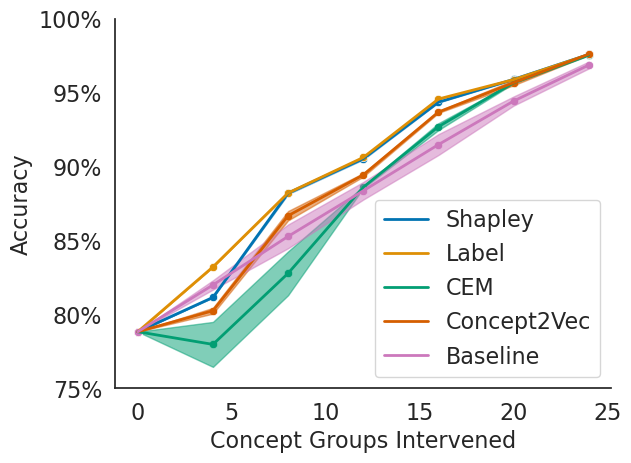

In [16]:
plot_all_results(results,methods,"intervention_all",show_std=True)

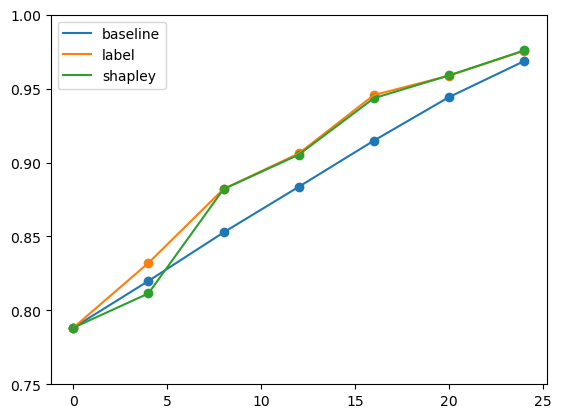

In [20]:
shortened_methods = ['baseline','label','shapley']
plot_all_results([data_by_method[i] for i in shortened_methods],shortened_methods)

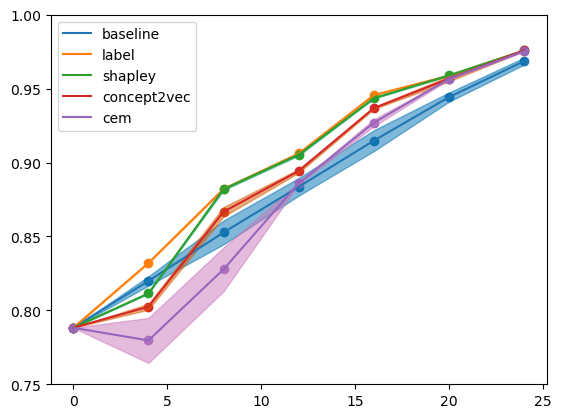

In [28]:
shortened_methods = ['baseline','label','shapley','concept2vec','cem']
plot_all_results([data_by_method[i] for i in shortened_methods],shortened_methods,show_std=True)

## CEM Intervention Ablation

In [17]:
extra_methods = ['shapley_indices','shapley_limit']
extra_data = {}

for m in extra_methods:
    extra_data[str(m)] = pickle.load(open("results/intervention/{}.pkl".format(m),"rb"))
    extra_data[str(m)] = {str(key): value for key, value in extra_data[str(m)].items()}

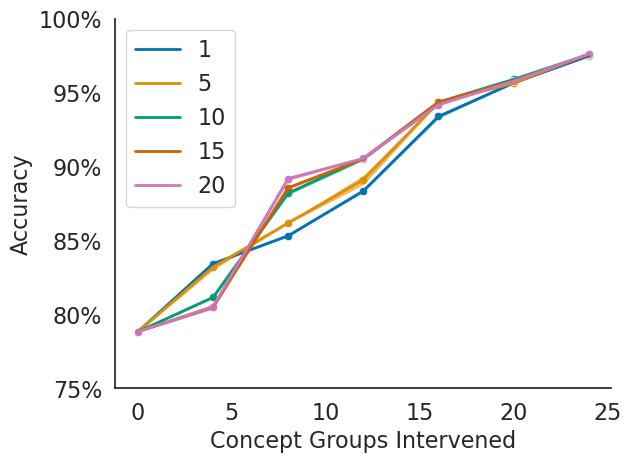

In [18]:
indices = sorted(extra_data['shapley_indices'].keys(),key=lambda k: int(k))
plot_all_results([extra_data['shapley_indices'][i] for i in indices],indices,"shapley_index",show_std=True)

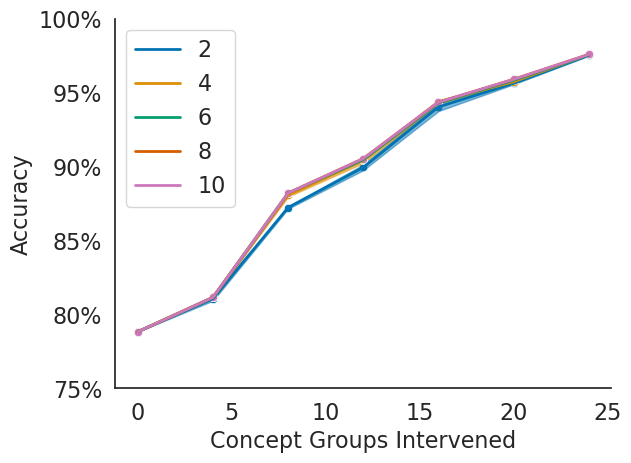

In [19]:
limits = sorted(extra_data['shapley_limit'].keys(),key=lambda k: int(k))
plot_all_results([extra_data['shapley_limit'][i] for i in limits],limits,"shapley_limit",show_std=True)